### Lecture3. 과제2- 가전제품 출하량

> ApplianceShipments.csv 파일에는 1985~1989년의 미국 가전제품에 대한 분기별 shipments가 있음
1. 시계열차트를 파이썬으로 그려보자
    - 시계열차트 파이썬 그림을 그리기 위해 날짜를 date_time()을 활용하여 Timestamp으로 구성 
    - plt.plot()을 활용하여 시계열 선차트를 그린다
2. 분기별 패턴을 자세하기 파악하기 위해 y축 값 3500 ~5000 범위를 확대해보자
    범위 확대(?)
3. Q1,Q2,Q3,Q4에 대한 차트 1개에 4개의 꺽은선 그래프를 파이썬으로 그려보자
    - 분기별 별도의 시계열 생성, 
    - hint) 분기 및 연도에 대한 열을 추가해서 할 수 있음
4. 데이터 프레임을 분기별로 그룹화한 다음 선그래프를 이용해 분기별 출하량을 그려보자
5. 연도별 집계(각 연도의 shipment 합계)를 구하고, 선그래프를 파이썬으로 그려보자

In [86]:
%pip install -U pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt     #시계열 시각화에 사용, 기본 그래프 활용 - 선, 막대, 산점도
import dmba as dmba
%matplotlib inline

In [22]:
# ApplianceShipments 데이터 불러오기
shipments_df = dmba.load_data('ApplianceShipments.csv', squeeze =True) #squeeze =True
shipments_df.shape

/Users/shimyuna/opt/anaconda3/lib/python3.9/site-packages/dmba/data.py:19: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = pd.read_csv(data_file, **kwargs)


(20, 2)

In [23]:
# 데이터 프레임의 형태 파악 
print(shipments_df.head())
print(shipments_df.info())

   Quarter  Shipments
0  Q1-1985       4009
1  Q2-1985       4321
2  Q3-1985       4224
3  Q4-1985       3944
4  Q1-1986       4123
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Quarter    20 non-null     object
 1   Shipments  20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes
None


> 설명
1. shipment.head를 통해 해당 데이터가 구성하고 있는 행, 열 정보에 대해 파악함 
2. shipment.info를 통해 데이터 파일의 컬럼별 Dtyep를 파악함

In [13]:
# 시계열 데이터 분석에 적합하도록, Quarter을 별도의 판다스 시계열 객체로 변환
## 분기에 대한 날짜 범위 생성 

shipments_df = shipments_df.iloc[0:,1:2]  # Appliance Shipment data에서 활용할 행, 열 범위를 지정
date_range = pd.date_range(start='1/1/1985', end='12/31/1989', freq='Q')  # date_range 함수를 활용해 여러개의 날짜가 들어 있는 배열 형태의 시계열 데이터 작성


shipments_df['Date'] = pd.to_datetime(date_range)  # 시계열데이터 배열을 'Date'라는 이름을 가진 컬럼으로 추가&시계열 데이터(date_time)으로 변경
shipments_ts = pd.Series(shipments_df.Shipments.values, index=shipments_df.Date)  # values = 열 설정, index = 행 설정
shipments_ts


Date
1985-03-31    4009
1985-06-30    4321
1985-09-30    4224
1985-12-31    3944
1986-03-31    4123
1986-06-30    4522
1986-09-30    4657
1986-12-31    4030
1987-03-31    4493
1987-06-30    4806
1987-09-30    4551
1987-12-31    4485
1988-03-31    4595
1988-06-30    4799
1988-09-30    4417
1988-12-31    4258
1989-03-31    4245
1989-06-30    4900
1989-09-30    4585
1989-12-31    4533
dtype: int64

Text(0, 0.5, 'Sipments(in million dollars)')

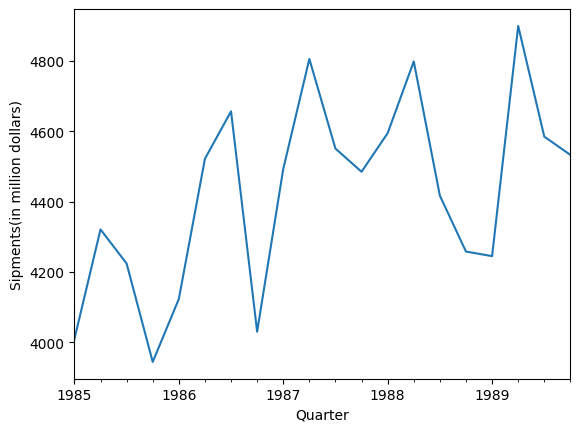

In [14]:
#1. 시계열차트를 파이썬으로 그려보자
## 시계열차트 파이썬 그림을 그리기 위해 날짜를 date_time()을 활용하여 Timestamp으로 구성 
## plt.plot()을 활용하여 시계열 기본차트를 그린다

# 1-(1)판다스 코드
shipments_ts.plot() #()안 값, ylim=(3000,5500), legend=False
plt.xlabel('Quarter')
plt.ylabel('Sipments(in million dollars)')

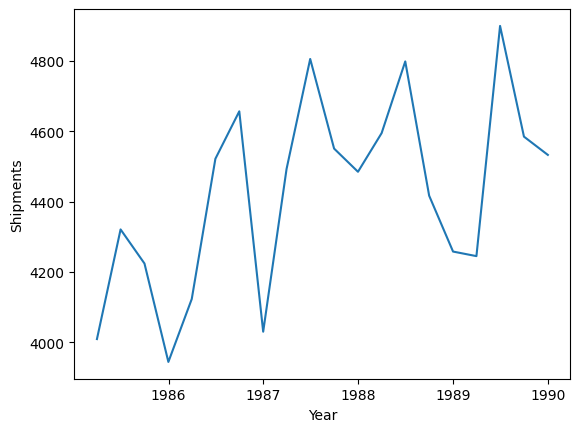

In [15]:
##1-(2) 맷플롯립 함수
plt.plot(shipments_ts.index, shipments_ts)
plt.xlabel('Year')
plt.ylabel('Shipments')

plt.show()

Text(0, 0.5, 'Sipments(in million dollars)')

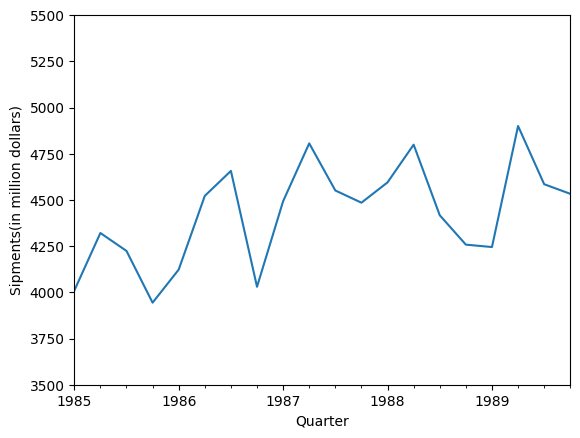

In [16]:
#2. 분기별 패턴을 자세하기 파악하기 위해 y축 값 3500 ~5000 범위를 확대해보자

shipments_ts.plot(ylim=(3500,5500), legend=False)
plt.xlabel('Quarter')
plt.ylabel('Sipments(in million dollars)')

In [17]:
shipments_ts.head(20)

Date
1985-03-31    4009
1985-06-30    4321
1985-09-30    4224
1985-12-31    3944
1986-03-31    4123
1986-06-30    4522
1986-09-30    4657
1986-12-31    4030
1987-03-31    4493
1987-06-30    4806
1987-09-30    4551
1987-12-31    4485
1988-03-31    4595
1988-06-30    4799
1988-09-30    4417
1988-12-31    4258
1989-03-31    4245
1989-06-30    4900
1989-09-30    4585
1989-12-31    4533
dtype: int64

In [18]:
# 3. Q1,Q2,Q3,Q4에 대한 차트 1개에 4개의 꺽은선 그래프를 파이썬으로 그리기
## 3-(1) 분기별로 별도의 시계열 생성

## 1분기 시계열 생성
Q1 = shipments_df.iloc[[0,4,8,12,16],:]
    #Q1분기 그래프를 그리기 위해 정리
Q1_ts = pd.Series(Q1.Shipments.values, index=Q1.Date)

## 2분기 시계열 생성
Q2 = shipments_df.iloc[[1,5,9,13,17], :]
    #Q1분기 그래프를 그리기 위해 정리
Q2_ts = pd.Series(Q2.Shipments.values, index=Q2.Date)

## 3분기 시계열 생성
Q3 = shipments_df.iloc[[2,6,10,14,18], :]
    #Q1분기 그래프를 그리기 위해 정리
Q3_ts = pd.Series(Q3.Shipments.values, index=Q3.Date)

## 4분기 시계열 생성
Q4 = shipments_df.iloc[[3,7,11,15,19], :]
    #Q1분기 그래프를 그리기 위해 정리
Q4_ts = pd.Series(Q4.Shipments.values, index=Q4.Date)

Q1,Q2,Q3,Q4

(    Shipments       Date
 0        4009 1985-03-31
 4        4123 1986-03-31
 8        4493 1987-03-31
 12       4595 1988-03-31
 16       4245 1989-03-31,
     Shipments       Date
 1        4321 1985-06-30
 5        4522 1986-06-30
 9        4806 1987-06-30
 13       4799 1988-06-30
 17       4900 1989-06-30,
     Shipments       Date
 2        4224 1985-09-30
 6        4657 1986-09-30
 10       4551 1987-09-30
 14       4417 1988-09-30
 18       4585 1989-09-30,
     Shipments       Date
 3        3944 1985-12-31
 7        4030 1986-12-31
 11       4485 1987-12-31
 15       4258 1988-12-31
 19       4533 1989-12-31)

Text(0, 0.5, 'Shipments')

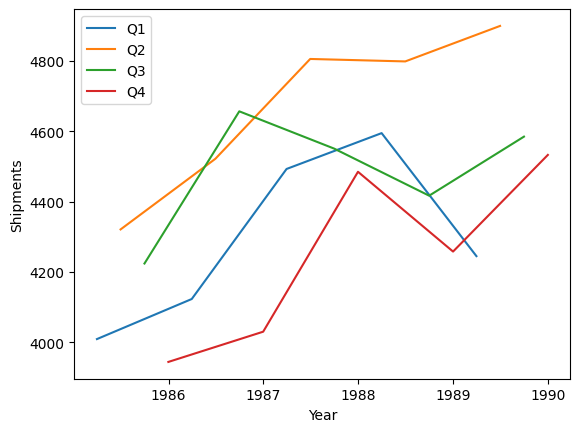

In [19]:
plt.plot(Q1_ts, data=Q1_ts, label = 'Q1')
plt.legend()
plt.plot(Q2_ts, data=Q2_ts, label = 'Q2')
plt.legend()
plt.plot(Q3_ts, data=Q3_ts, label = 'Q3')
plt.legend()
plt.plot(Q4_ts, data=Q3_ts, label = 'Q4')
plt.legend()

plt.xlabel('Year')
plt.ylabel('Shipments')

Text(0, 0.5, 'Shipments')

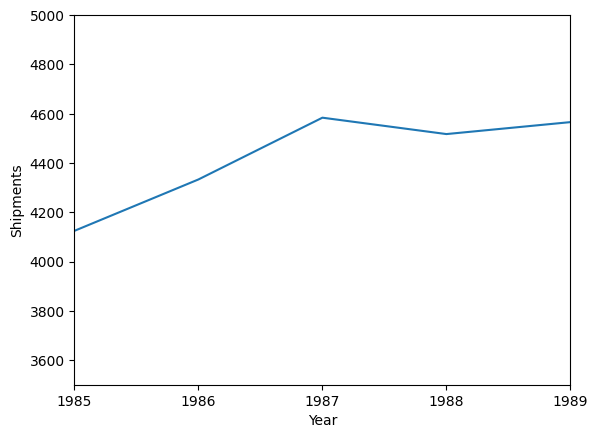

In [20]:
# 연간 집계 
byYear = shipments_ts.groupby(pd.Grouper(freq='A')).mean()
byYear.plot(ylim=(3500, 5000), legend=False)
plt.xlabel('Year')
plt.ylabel('Shipments')